In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor

In [2]:
file_location = './nrippner-ols-regression-challenge/nrippner-ols-regression-challenge/data/cancer_reg.csv'
df = pd.read_csv(file_location)

In [3]:
df.head(5)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


### Show all columns names and what the meaning behind them

In [4]:
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'avghouseholdsize', 'percentmarried', 'pctnohs18_24', 'pcths18_24',
       'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over',
       'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

**TARGET_deathRate**: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

**avgAnnCount**: Mean number of reported cases of cancer diagnosed annually(a)

**avgDeathsPerYear**: Mean number of reported mortalities due to cancer(a)

**incidenceRate**: Mean per capita (100,000) cancer diagoses(a)

**medianIncome**: Median income per county (b)

**popEst2015**: Population of county (b)

**povertyPercent**: Percent of populace in poverty (b)

**studyPerCap**: Per capita number of cancer-related clinical trials per county (a)

**binnedInc**: Median income per capita binned by decile (b)

**MedianAge**: Median age of county residents (b)

**MedianAgeMale**: Median age of male county residents (b)

**MedianAgeFemale**: Median age of female county residents (b)

**Geography**: County name (b)

**AvgHouseholdSize**: Mean household size of county (b)

**PercentMarried**: Percent of county residents who are married (b)

**PctNoHS18_24**: Percent of county residents ages 18-24 highest education attained: less than high school (b)

**PctHS18_24**: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

**PctSomeCol18_24**: Percent of county residents ages 18-24 highest education attained: some college (b)

**PctBachDeg18_24**: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

**PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

**PctBachDeg25_Over**: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

**PctEmployed16_Over**: Percent of county residents ages 16 and over employed (b)

**PctUnemployed16_Over**: Percent of county residents ages 16 and over unemployed (b)

**PctPrivateCoverage**: Percent of county residents with private health coverage (b)

**PctPrivateCoverageAlone**: Percent of county residents with private health coverage alone (no public assistance) (b)

**PctEmpPrivCoverage**: Percent of county residents with employee-provided private health coverage (b)

**PctPublicCoverage**: Percent of county residents with government-provided health coverage (b)

**PctPubliceCoverageAlone**: Percent of county residents with government-provided health coverage alone (b)

**PctWhite**: Percent of county residents who identify as White (b)

**PctBlack**: Percent of county residents who identify as Black (b)

**PctAsian**: Percent of county residents who identify as Asian (b)

**PctOtherRace**: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

**PctMarriedHouseholds**: Percent of married households (b)

**BirthRate**: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

### Explore more about data type of each columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  avghouseholdsize         3047 non-null   float64
 14  percentmarried          

### Check if there is any null value

In [6]:
df.isnull().values.any()

True

In [7]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['pctsomecol18_24', 'pctemployed16_over', 'pctprivatecoveragealone']


In [8]:
df[columns_with_nan].isna().sum()

pctsomecol18_24            2285
pctemployed16_over          152
pctprivatecoveragealone     609
dtype: int64

There are only 3047 rows of data so we can't just drop 2285 rows of missing data. So I will fill it with its column mean

In [9]:
df["pctsomecol18_24"].fillna(df["pctsomecol18_24"].mean(), inplace = True)
df["pctemployed16_over"].fillna(df["pctemployed16_over"].mean(), inplace = True)
df["pctprivatecoveragealone"].fillna(df["pctprivatecoveragealone"].mean(), inplace = True)

Check again

In [10]:
df.isnull().values.any()

False

Now we good to go

### Check for duplicated data

In [37]:
df.duplicated().values.any()

False

There is no duplicated row in our dataset

### Check correlation

<AxesSubplot: >

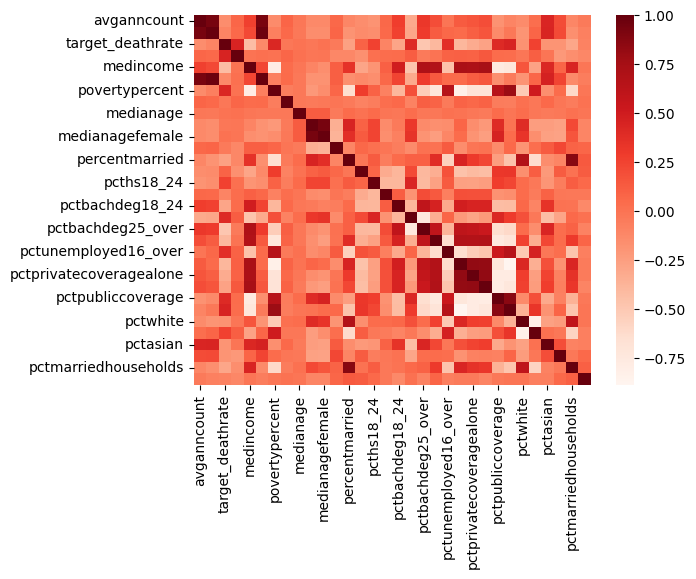

In [11]:
cor = df.corr(numeric_only=True)
sns.heatmap(cor, cmap=plt.cm.Reds, fmt='.2f')

In [12]:
strong_features = []
correlations = []
for idx, correlation in cor['target_deathrate'].items():
    if abs(correlation) >= 0.3 and idx != 'target_deathrate':
        strong_features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 
                              'Features': strong_features}).sort_values(by=['Correlations'], ascending=False)
corr_price_df

,Correlations,Features
0,0.449432,incidencerate
10,0.449358,pctpubliccoveragealone
2,0.429389,povertypercent
3,0.404589,pcths25_over
9,0.404572,pctpubliccoverage
6,0.378412,pctunemployed16_over
8,-0.326067,pctprivatecoveragealone
7,-0.386066,pctprivatecoverage
5,-0.397487,pctemployed16_over
1,-0.428615,medincome


Here we see some features whose correlation with our target is pretty strong

### Modify binnedinc to category variables

In [13]:
old_binnedinc = list(df.binnedinc.unique())
new_binnedinc = {old_binnedinc[i]: i for i in range(0, len(old_binnedinc))}
df.replace({'binnedinc': new_binnedinc}, inplace=True)

### Statistical summary

In [14]:
df_stats = df.describe().T

skew_results = []

for idx, val in enumerate(df_stats.index):
    skew_results.append(df[val].skew())
    
df_stats['skew'] = skew_results

df_stats

,count,mean,std,min,25%,50%,75%,max,skew
avganncount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04,10.680460
avgdeathsperyear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04,11.949188
target_deathrate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02,0.274724
incidencerate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03,0.771935
medincome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05,1.408071
popest2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07,14.289926
povertypercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01,0.930713
studypercap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03,8.713690
binnedinc,3047.0,4.506728,2.872288,0.000000,2.000000,5.000000,7.000000,9.000000e+00,-0.001554
medianage,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02,9.989944


Here we see that our target is very close to a normal distribution (~0.274) so there is no need to adjust anything. <br>
The plot below can show this more clearly

<AxesSubplot: xlabel='target_deathrate', ylabel='Count'>

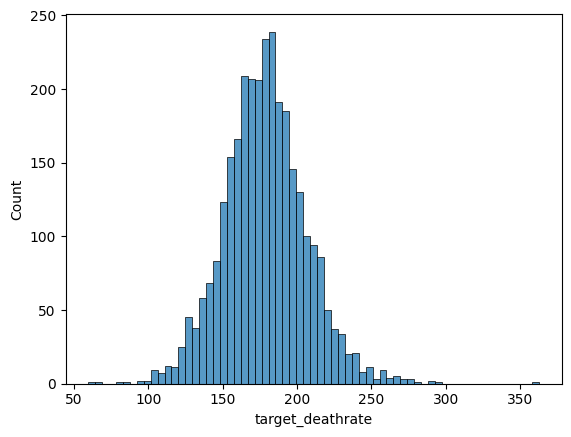

In [15]:
sns.histplot(df['target_deathrate'])

### Explore more deeply about our dataset

##### Mean death rate group by geography (split to District and State)

In [16]:
df[['District','State']] = df.geography.str.split(",",expand=True)
df[['District','State','target_deathrate']].sort_values('target_deathrate')

,District,State,target_deathrate
1093,Pitkin County,Colorado,59.7
1941,Presidio County,Texas,66.3
1065,Eagle County,Colorado,80.8
1402,Summit County,Colorado,87.6
463,Divide County,North Dakota,93.8
...,...,...,...
2595,Perry County,Kentucky,280.8
1220,Madison County,Mississippi,292.5
2597,Powell County,Kentucky,292.5
1365,Woodson County,Kansas,293.9


In [17]:
df.groupby(['State', 'District'])['target_deathrate'].mean()

State     District         
 Alabama  Autauga County       178.3
          Baldwin County       174.3
          Barbour County       192.7
          Bibb County          212.4
          Blount County        175.4
                               ...  
 Wyoming  Sweetwater County    141.1
          Teton County         136.9
          Uinta County         132.8
          Washakie County      182.3
          Weston County        182.6
Name: target_deathrate, Length: 3047, dtype: float64

In [34]:
df.groupby('State')['target_deathrate'].mean().sort_values()

State
 Utah                    135.751852
 Colorado                141.561667
 Hawaii                  142.975000
 Arizona                 149.086667
 Idaho                   154.202381
 New Mexico              156.181250
 Connecticut             157.712500
 California              158.096491
 Wyoming                 158.986957
 North Dakota            160.360784
 Nebraska                160.553750
 Minnesota               161.481609
 Montana                 163.185417
 South Dakota            163.545763
 Massachusetts           164.800000
 Rhode Island            165.220000
 Iowa                    166.488889
 Washington              166.492308
 Kansas                  167.834314
 New Jersey              168.633333
 Oregon                  170.288889
 New Hampshire           170.880000
 Texas                   171.585408
 New York                171.640323
 Wisconsin               172.373611
 Pennsylvania            175.422388
 Vermont                 176.271429
 Maryland             

Here we see Utah has the lowest mean value of death rate and the highest is Kentucky

### Split data

In [23]:
X = df.drop(['target_deathrate', 'geography','State', 'District'], axis=1)
y = df['target_deathrate']

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

### Linear Regression

In [30]:
def  plot_dis(y,x,model):
    yhat = model.predict(x)
    plt.figure(figsize=(10,10))
    plt.scatter(y, yhat, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(yhat), max(y))
    p2 = min(min(yhat), min(y))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

In [25]:
def model_summary(model, X_test, y_test):
    print('R-square score:', model.score(X_test, y_test))
    predictions = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    print('Root mean square error:', RMSE)
    rss = pd.DataFrame({'Actual': y_test, 'Predicted':predictions})
    print('Residual sum of squares: '+ str(np.sum(np.square(rss['Predicted'] - rss['Actual']))))

R-square score: 0.5152790370688194
Root mean square error: 19.246495383736434
Residual sum of squares: 225960.82657927455


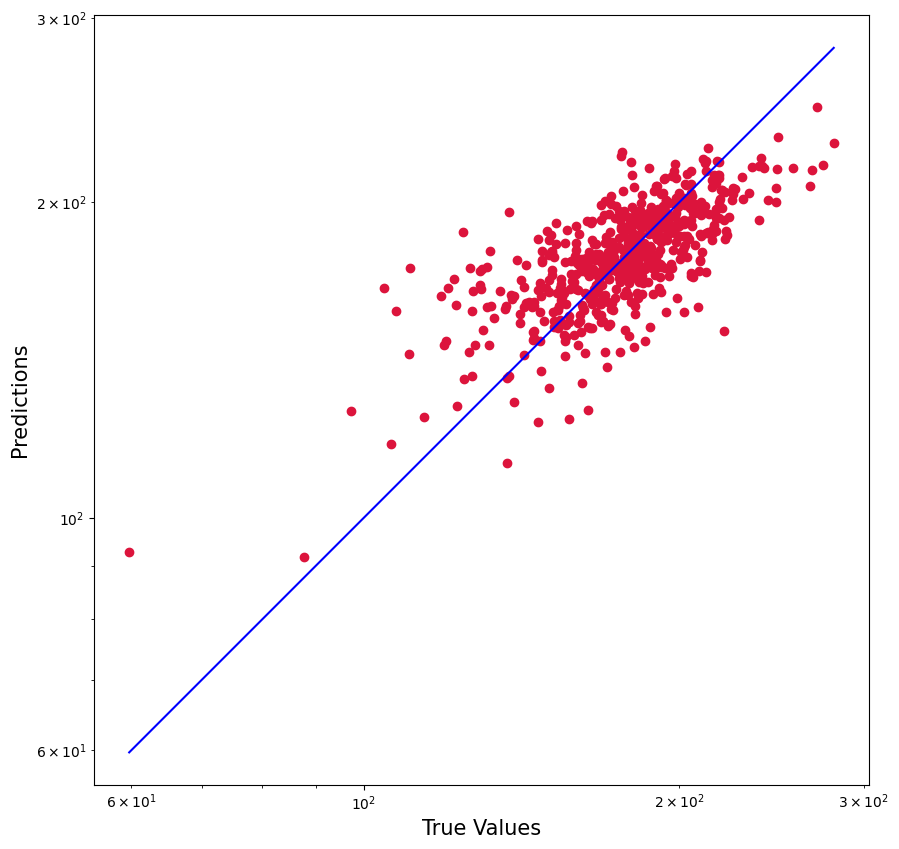

In [31]:
X1 = X_train
Y1 = y_train
lr_model1 = LinearRegression()
lr_model1.fit(X1, Y1)
model_summary(lr_model1, X_test, y_test)
plot_dis(y_test, X_test, lr_model1)